In [244]:
import yaml
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [245]:
db = '../data/experiments/experimentDB.yaml'
_name = 'ResNet50-Single_{part}_FCN_{ntrain}samples'
parts = ['Wings', 'Body', 'Stern']
colors = ['c', 'm', 'g']
iteration = '500'
setsizes = range(1, 12)
with open(db, 'r') as f:
    c = yaml.load(f)

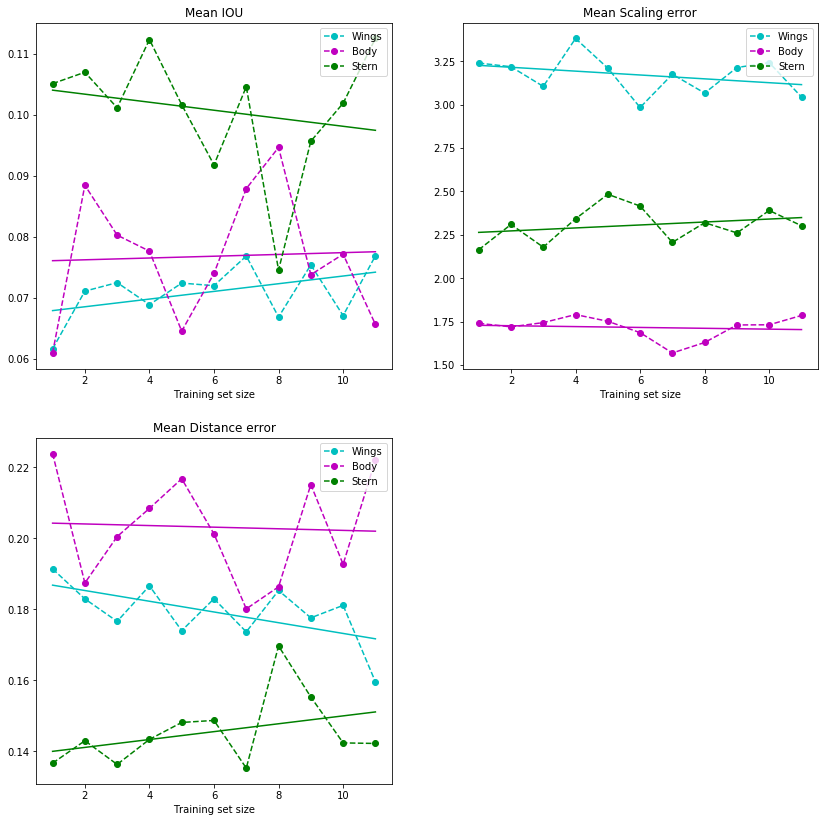

In [248]:
iou = {}
dist = {}
scal = {}
for part in parts:
    iou[part] = []
    dist[part] = []
    scal[part] = []
    for ntrain in setsizes:
        name = _name.format(part=part, ntrain=ntrain)
        mat = c[name][iteration]
        iou[part].append(mat[3][1])
        dist[part].append(mat[4][1])
        scal[part].append(mat[5][1])
        
fig = plt.figure(figsize=(14, 14))
for idx, tit, vari in [(1, 'IOU', iou), (2, 'Scaling error', scal), (3, 'Distance error', dist)]:
    plt.subplot(2, 2, idx)
    for part, color in zip(parts, colors):
        slope, intercept, _, _, _ = linregress(setsizes, vari[part])
        plt.plot(setsizes, vari[part], '--o', label=part, color=color)
        plt.plot(setsizes, intercept + slope * setsizes, color=color)
    plt.title('Mean ' + tit)
    plt.xlabel('Training set size')
    plt.legend(loc='upper right')
plt.show()

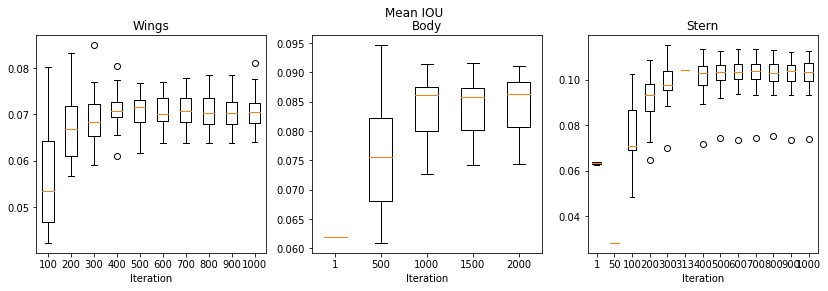

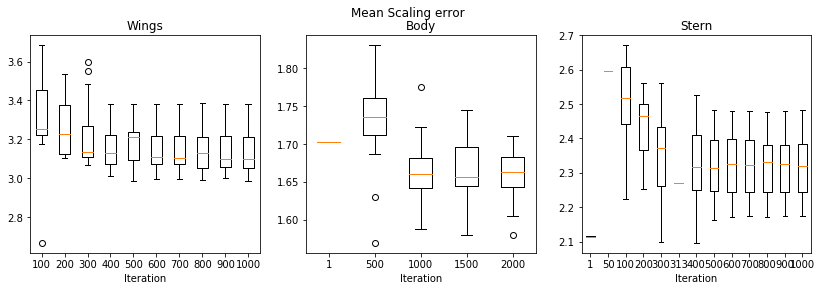

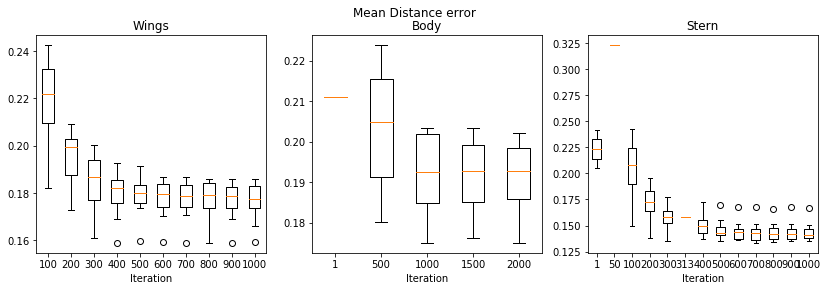

In [247]:
iou = dict([(part, {}) for part in parts])
dist = dict([(part, {}) for part in parts])
scal = dict([(part, {}) for part in parts])

for name, imat in c.items():
    for it, mat in sorted(imat.items()):
        it = int(it)
        part = [p for p in parts if p in name][0]
        for idx, vari in [(3, iou), (4, dist), (5, scal)]:
            if it in vari[part]:
                vari[part][it].append(mat[idx][1])
            else:
                vari[part][it] = [mat[idx][1]]
for tit, vari in [('IOU', iou), ('Scaling error', scal), ('Distance error', dist)]:
    fig = plt.figure(figsize=(14,4))
    for idx, (part, color) in enumerate(zip(parts, colors)):
        items = sorted(vari[part].items())
        y = [i[1] for i in items]
        x = [i[0] for i in items]
        plt.subplot(1, 3, idx + 1)
        plt.boxplot(y, labels=x)
        plt.xlabel('Iteration')
        plt.title(part)
    plt.suptitle('Mean ' + tit)
    plt.show()